# Case studies Sales

In [32]:
# Import sales.csv: sales
sales <- read.csv("sales.csv", stringsAsFactors = FALSE)

# import library
library(dplyr)
library(tidyr)
library(ggplot2)

# setting the graphic width and height for ggplot
library(repr)
options(repr.plot.width=6, repr.plot.height=4)

Examining the data

In [33]:
dim(sales)

[1] 5000   46

In [34]:
head(sales)

X,event_id,primary_act_id,secondary_act_id,purch_party_lkup_id,event_name,primary_act_name,secondary_act_name,major_cat_name,minor_cat_name,...,edu_1st_indv_val,edu_2nd_indv_val,adults_in_hh_num,married_ind,child_present_ind,home_owner_ind,occpn_val,occpn_1st_val,occpn_2nd_val,dist_to_ven
1,abcaf1adb99a935fc661,43f0436b905bfa7c2eec,b85143bf51323b72e53c,7dfa56dd7d5956b17587,Xfinity Center Mansfield Premier Parking: Florida Georgia Line,XFINITY Center Mansfield Premier Parking,NULL,MISC,PARKING,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,6c56d7f08c95f2aa453c,1a3e9aecd0617706a794,f53529c5679ea6ca5a48,4f9e6fc637eaf7b736c2,Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,Dave Matthews Band,MISC,CAMPING,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,59
3,c7ab4524a121f9d687d2,4b677c3f5bec71eec8d1,b85143bf51323b72e53c,6c2545703bd527a7144d,Dodge Theatre Adams Street Parking - benise,Parking Event,NULL,MISC,PARKING,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,394cb493f893be9b9ed1,b1ccea01ad6ef8522796,b85143bf51323b72e53c,527d6b1eaffc69ddd882,Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow,Gexa Energy Pavilion VIP Parking,NULL,MISC,PARKING,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,55b5f67e618557929f48,91c03a34b562436efa3c,b85143bf51323b72e53c,8bd62c394a35213bdf52,Premier Parking - motley crue,White River Amphitheatre Premier Parking,NULL,MISC,PARKING,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,4f10fd8b9f550352bd56,ac4b847b3fde66f2117e,63814f3d63317f1b56c4,3b3a628f83135acd0676,Fast Lane Access: Journey,Fast Lane Access,Journey,MISC,SPECIAL ENTRY (UPSELL),...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [35]:
names(sales)

[1] "X"                      "event_id"               "primary_act_id"        
 [4] "secondary_act_id"       "purch_party_lkup_id"    "event_name"            
 [7] "primary_act_name"       "secondary_act_name"     "major_cat_name"        
[10] "minor_cat_name"         "la_event_type_cat"      "event_disp_name"       
[13] "ticket_text"            "tickets_purchased_qty"  "trans_face_val_amt"    
[16] "delivery_type_cd"       "event_date_time"        "event_dt"              
[19] "presale_dt"             "onsale_dt"              "sales_ord_create_dttm" 
[22] "sales_ord_tran_dt"      "print_dt"               "timezn_nm"             
[25] "venue_city"             "venue_state"            "venue_postal_cd_sgmt_1"
[28] "sales_platform_cd"      "print_flg"              "la_valid_tkt_event_flg"
[31] "fin_mkt_nm"             "web_session_cookie_val" "gndr_cd"               
[34] "age_yr"                 "income_amt"             "edu_val"               
[37] "edu_1st_indv_val"       "edu_2nd_indv_val"       "adults_in_hh_num"      
[40] "married_ind"            "child_present_ind"      "home_owner_ind"        
[43] "occpn_val"              "occpn_1st_val"          "occpn_2nd_val"         
[46] "dist_to_ven"

Summarise the data

In [36]:
str(sales)

'data.frame':	5000 obs. of  46 variables:
 $ X                     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ event_id              : chr  "abcaf1adb99a935fc661" "6c56d7f08c95f2aa453c" "c7ab4524a121f9d687d2" "394cb493f893be9b9ed1" ...
 $ primary_act_id        : chr  "43f0436b905bfa7c2eec" "1a3e9aecd0617706a794" "4b677c3f5bec71eec8d1" "b1ccea01ad6ef8522796" ...
 $ secondary_act_id      : chr  "b85143bf51323b72e53c" "f53529c5679ea6ca5a48" "b85143bf51323b72e53c" "b85143bf51323b72e53c" ...
 $ purch_party_lkup_id   : chr  "7dfa56dd7d5956b17587" "4f9e6fc637eaf7b736c2" "6c2545703bd527a7144d" "527d6b1eaffc69ddd882" ...
 $ event_name            : chr  "Xfinity Center Mansfield Premier Parking: Florida Georgia Line" "Gorge Camping - dave matthews band - sept 3-7" "Dodge Theatre Adams Street Parking - benise" "Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow" ...
 $ primary_act_name      : chr  "XFINITY Center Mansfield Premier Parking" "Gorge Camping" "Parking Event" "Gexa Energy Pavilion VI

In [37]:
glimpse(sales)

Observations: 5,000
Variables: 46
$ X                      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...
$ event_id               <chr> "abcaf1adb99a935fc661", "6c56d7f08c95f2aa453...
$ primary_act_id         <chr> "43f0436b905bfa7c2eec", "1a3e9aecd0617706a79...
$ secondary_act_id       <chr> "b85143bf51323b72e53c", "f53529c5679ea6ca5a4...
$ purch_party_lkup_id    <chr> "7dfa56dd7d5956b17587", "4f9e6fc637eaf7b736c...
$ event_name             <chr> "Xfinity Center Mansfield Premier Parking: F...
$ primary_act_name       <chr> "XFINITY Center Mansfield Premier Parking", ...
$ secondary_act_name     <chr> "NULL", "Dave Matthews Band", "NULL", "NULL"...
$ major_cat_name         <chr> "MISC", "MISC", "MISC", "MISC", "MISC", "MIS...
$ minor_cat_name         <chr> "PARKING", "CAMPING", "PARKING", "PARKING", ...
$ la_event_type_cat      <chr> "PARKING", "INVALID", "PARKING", "PARKING", ...
$ event_disp_name        <chr> "Xfinity Center Mansfield Premier Parking: F...
$ ticket_text     

In [38]:
summary(sales)

       X          event_id         primary_act_id     secondary_act_id  
 Min.   :   1   Length:5000        Length:5000        Length:5000       
 1st Qu.:1251   Class :character   Class :character   Class :character  
 Median :2500   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2500                                                           
 3rd Qu.:3750                                                           
 Max.   :5000                                                           
                                                                        
 purch_party_lkup_id  event_name        primary_act_name   secondary_act_name
 Length:5000         Length:5000        Length:5000        Length:5000       
 Class :character    Class :character   Class :character   Class :character  
 Mode  :character    Mode  :character   Mode  :character   Mode  :character  
                                                                             
                          

Removing reduntant info 
<br>The first column X is not needed. 

In [39]:
sales2 <- sales[, -1]

The first 4 columns internal id which gives us no information and the last 15 variables have mostly NA and therefore not useful

In [40]:
# Define a vector of column indices: keep
keep <- c(5:30)

# Subset sales2 using keep: sales3
sales3 <- sales2[, keep]

Separating columns

In [41]:
# Split event_date_time: sales4
sales4 <- separate(sales3, event_date_time,
                   c("event_dt", "event_time"), sep = " ")

# Split sales_ord_create_dttm: sales5
sales5 <- separate(sales4, sales_ord_create_dttm,
                  c("ord_create_dt", "ord_create_time"), sep = " ")

Warning message:
"Expected 2 pieces. Missing pieces filled with `NA` in 4 rows [2516, 3863, 4082, 4183]."

Dealing with warnings

In [42]:
# Define an issues vector
issues <- c(2516, 3863, 4082, 4183)

# Print values of sales_ord_create_dttm at these indices
sales3$sales_ord_create_dttm[issues]

# Print a well-behaved value of sales_ord_create_dttm
sales3$sales_ord_create_dttm[2517]

[1] "NULL" "NULL" "NULL" "NULL"

[1] "2013-08-04 23:07:19"

Identifying dates

In [43]:
# Load stringr
library(stringr)

# Find columns of sales5 containing "dt": date_cols
date_cols <- str_detect(names(sales5), "dt")

head(sales5[, date_cols])
# Load lubridate
library(lubridate)

# Coerce date columns into Date objects
sales5[, date_cols] <- lapply(sales5[, date_cols], ymd )

event_dt,presale_dt,onsale_dt,ord_create_dt,sales_ord_tran_dt,print_dt
2015-09-12,NULL,2015-05-15,2015-09-11,2015-09-11,2015-09-12
2009-09-05,NULL,2009-03-13,2009-07-06,2009-07-05,2009-09-01
2006-04-22,NULL,2006-02-25,2006-04-05,2006-04-05,2006-04-05
2011-09-03,NULL,2011-04-22,2011-07-01,2011-07-01,2011-07-06
2005-07-31,2005-03-02,2005-03-04,2005-06-18,2005-06-18,2005-06-28
2012-07-22,NULL,2012-04-11,2012-07-21,2012-07-21,2012-07-21


Warning message:
" 2892 failed to parse."Warning message:
" 101 failed to parse."Warning message:
" 4 failed to parse."Warning message:
" 424 failed to parse."

Dealing with warnings
<br> some more warnings, it is probably due to NA but better check

In [44]:
# Find date columns (
date_cols <- str_detect(names(sales5), "dt")

# Create logical vectors indicating missing values 
missing <- lapply(sales5[, date_cols], is.na)

# Create a numerical vector that counts missing values: num_missing
num_missing <- sapply(missing, sum)

# Print num_missing
num_missing

event_dt        presale_dt         onsale_dt     ord_create_dt 
                0              2892               101                 4 
sales_ord_tran_dt          print_dt 
                0               424

In [45]:
glimpse(sales5)

Observations: 5,000
Variables: 27
$ event_name             <chr> "Xfinity Center Mansfield Premier Parking: F...
$ primary_act_name       <chr> "XFINITY Center Mansfield Premier Parking", ...
$ secondary_act_name     <chr> "NULL", "Dave Matthews Band", "NULL", "NULL"...
$ major_cat_name         <chr> "MISC", "MISC", "MISC", "MISC", "MISC", "MIS...
$ minor_cat_name         <chr> "PARKING", "CAMPING", "PARKING", "PARKING", ...
$ la_event_type_cat      <chr> "PARKING", "INVALID", "PARKING", "PARKING", ...
$ event_disp_name        <chr> "Xfinity Center Mansfield Premier Parking: F...
$ ticket_text            <chr> "   THIS TICKET IS VALID        FOR PARKING ...
$ tickets_purchased_qty  <int> 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 4, 1, 1,...
$ trans_face_val_amt     <dbl> 45, 75, 5, 20, 20, 10, 30, 28, 20, 25, 20, 9...
$ delivery_type_cd       <chr> "eTicket", "TicketFast", "TicketFast", "Mail...
$ event_dt               <date> 2015-09-12, 2009-09-05, 2006-04-22, 2011-09...
$ event_time      

Combining columns

In [46]:
# Combine the venue_city and venue_state columns
sales6 <- unite(sales5, venue_city_state, venue_city, venue_state, sep = ", ")


# View the head of sales6
head(sales6)

event_name,primary_act_name,secondary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,event_disp_name,ticket_text,tickets_purchased_qty,trans_face_val_amt,...,ord_create_time,sales_ord_tran_dt,print_dt,timezn_nm,venue_city_state,venue_postal_cd_sgmt_1,sales_platform_cd,print_flg,la_valid_tkt_event_flg,fin_mkt_nm
Xfinity Center Mansfield Premier Parking: Florida Georgia Line,XFINITY Center Mansfield Premier Parking,NULL,MISC,PARKING,PARKING,Xfinity Center Mansfield Premier Parking: Florida Georgia Line,"THIS TICKET IS VALID FOR PARKING ONLY GOOD THIS DAY ONLY PREMIER PARKING PASS XFINITY CENTER,LOTS 4 PM SAT SEP 12 2015 7:30 PM",1,45,...,18:17:45,2015-09-11,2015-09-12,EST,"MANSFIELD, MASSACHUSETTS",02048,www.concerts.livenation.com,T,N,Boston
Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,Dave Matthews Band,MISC,CAMPING,INVALID,Gorge Camping - dave matthews band - sept 3-7,"%OVERNIGHT C A M P I N G%* * * * * *%GORGE CAMPGROUND%* GOOD THIS DATE ONLY *%SEP 3 - 6, 2009",1,75,...,00:00:00,2009-07-05,2009-09-01,PST,"QUINCY, WASHINGTON",98848,NULL,T,N,Seattle
Dodge Theatre Adams Street Parking - benise,Parking Event,NULL,MISC,PARKING,PARKING,Dodge Theatre Adams Street Parking - benise,ADAMS STREET GARAGE%PARKING FOR 4/21/06 ONLY%DODGE THEATRE PARKING PASS%ENTRANCE ON ADAMS STREET%BENISE%GARAGE OPENS AT 6:00PM,1,5,...,00:00:00,2006-04-05,2006-04-05,MST,"PHOENIX, ARIZONA",85003,NULL,T,N,Arizona
Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow,Gexa Energy Pavilion VIP Parking,NULL,MISC,PARKING,PARKING,Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow,THIS TICKET IS VALID FOR PARKING ONLY GOOD FOR THIS DATE ONLY VIP PARKING PASS GEXA ENERGY PAVILION FRI SEP 02 2011 7:00 PM,1,20,...,17:38:50,2011-07-01,2011-07-06,CST,"DALLAS, TEXAS",75210,NULL,T,N,Dallas
Premier Parking - motley crue,White River Amphitheatre Premier Parking,NULL,MISC,PARKING,PARKING,Premier Parking - motley crue,"THIS TICKET IS VALID%FOR PARKING ONLY%GOOD THIS DATE ONLY%PREMIER PARKING PASS%WHITE RIVER AMPHITHEATRE%SAT JUL 30, 2005 6:00PM",1,20,...,00:00:00,2005-06-18,2005-06-28,PST,"AUBURN, WASHINGTON",98092,NULL,T,N,Seattle
Fast Lane Access: Journey,Fast Lane Access,Journey,MISC,SPECIAL ENTRY (UPSELL),UPSELL,Fast Lane Access: Journey,FAST LANE JOURNEY FAST LANE EVENT THIS IS NOT A TICKET SAN MANUEL AMPHITHEATER SAT JUL 21 2012 7:00 PM,2,10,...,17:20:18,2012-07-21,2012-07-21,PST,"SAN BERNARDINO, CALIFORNIA",92407,www.livenation.com,T,N,Los Angeles


# Case study MBTA Ridership Data
The Massachusetts Bay Transportation Authority ("MBTA" or just "the T" for short) manages America's oldest subway, as well as Greater Boston's commuter rail, ferry, and bus systems.

It's your first day on the job as the T's data analyst and you've been tasked with analyzing average ridership through time.

In [47]:
# Load readxl
library(readxl)

# Import mbta.xlsx and skip first row: mbta
mbta <- read_excel("mbta.xlsx", skip = 1)

Examine the data

In [48]:
# View the structure of mbta
glimpse(mbta)

# View the first 6 rows of mbta
head(mbta)

# View a summary of mbta
summary(mbta)

Observations: 11
Variables: 60
$ X__1      <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11
$ mode      <chr> "All Modes by Qtr", "Boat", "Bus", "Commuter Rail", "Heav...
$ `2007-01` <chr> "NA", "4", "335.819", "142.2", "435.294", "227.231", "0.0...
$ `2007-02` <chr> "NA", "3.6", "338.675", "138.5", "448.271", "240.262", "-...
$ `2007-03` <dbl> 1187.653, 40.000, 339.867, 137.700, 458.583, 241.444, 0.1...
$ `2007-04` <chr> "NA", "4.3", "352.162", "139.5", "472.201", "255.557", "-...
$ `2007-05` <chr> "NA", "4.9", "354.367", "139", "474.579", "248.262", "0.0...
$ `2007-06` <dbl> 1245.959, 5.800, 350.543, 143.000, 477.032, 246.108, 0.09...
$ `2007-07` <chr> "NA", "6.521", "357.519", "142.391", "471.735", "243.286"...
$ `2007-08` <chr> "NA", "6.572", "355.479", "142.364", "461.605", "234.907"...
$ `2007-09` <dbl> 1256.571, 5.469, 372.598, 143.051, 499.566, 265.748, -0.0...
$ `2007-10` <chr> "NA", "5.145", "368.847", "146.542", "457.741", "241.434"...
$ `2007-11` <chr> "NA", "3.763", "330.826", "145

X__1,mode,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,...,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10
1,All Modes by Qtr,NA,NA,1187.653,NA,NA,1245.959,NA,NA,...,NA,NA,1223.452,NA,NA,1302.414,NA,NA,1290.549,NA
2,Boat,4,3.6,40.000,4.3,4.9,5.800,6.521,6.572,...,3.14,3.284,3.674,4.251,4.431,5.474,6.581,6.733,5.003,4.484
3,Bus,335.819,338.675,339.867,352.162,354.367,350.543,357.519,355.479,...,334.958,346.234,380.399,380.446,385.289,376.317,361.585,353.793,388.271,398.456
4,Commuter Rail,142.2,138.5,137.700,139.5,139,143.000,142.391,142.364,...,128.396,125.463,134.374,134.169,136.14,135.581,132.41,130.616,136.901,128.72
5,Heavy Rail,435.294,448.271,458.583,472.201,474.579,477.032,471.735,461.605,...,468.418,504.068,516.730,528.631,528.122,529.528,532.888,508.145,550.137,554.932
6,Light Rail,227.231,240.262,241.444,255.557,248.262,246.108,243.286,234.907,...,198.45,219.886,227.935,242.28,225.776,221.865,231.01,220.164,244.949,237.768


      X__1          mode             2007-01            2007-02         
 Min.   : 1.0   Length:11          Length:11          Length:11         
 1st Qu.: 3.5   Class :character   Class :character   Class :character  
 Median : 6.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 6.0                                                           
 3rd Qu.: 8.5                                                           
 Max.   :11.0                                                           
    2007-03           2007-04            2007-05             2007-06        
 Min.   :   0.114   Length:11          Length:11          Min.   :   0.096  
 1st Qu.:   9.278   Class :character   Class :character   1st Qu.:   5.700  
 Median : 137.700   Mode  :character   Mode  :character   Median : 143.000  
 Mean   : 330.293                                         Mean   : 339.846  
 3rd Qu.: 399.225                                         3rd Qu.: 413.788  
 Max.   :1204.725          

Removing unnecessary rows and columns

It appears that the data are organized with observations stored as columns rather than as rows. 

In [49]:
# Remove the first column of mbta
mbta1 <- mbta[, -1]

All of the NA values are stored in the All Modes by Qtr row. This row really belongs in a different data frame; it is a quarterly average of weekday MBTA ridership. Since this dataset tracks monthly average ridership, you'll remove that row.
Similarly, the 7th row (Pct Chg / Yr) and the 11th row (TOTAL) are not really observations as much as they are analysis. Go ahead and remove the 7th and 11th rows as well.

In [50]:
mbta2 <- mbta1[-c(1, 7, 11),]

The different modes of transportation (commuter rail, bus, subway, ferry, ...) are variables, providing information about each month's average ridership. The months themselves are observations. You can tell which is which because as you go through time, the month changes, but the modes of transport offered by the T do not.

In [51]:
# Gather columns of mbta3: mbta4
mbta3 <- gather(mbta2, key = "month", value = "thou_riders", - mode)

# View the head of mbta4
head(mbta3)

mode,month,thou_riders
Boat,2007-01,4
Bus,2007-01,335.819
Commuter Rail,2007-01,142.2
Heavy Rail,2007-01,435.294
Light Rail,2007-01,227.231
Private Bus,2007-01,4.772


In [52]:
str(mbta3)

Classes 'tbl_df', 'tbl' and 'data.frame':	464 obs. of  3 variables:
 $ mode       : chr  "Boat" "Bus" "Commuter Rail" "Heavy Rail" ...
 $ month      : chr  "2007-01" "2007-01" "2007-01" "2007-01" ...
 $ thou_riders: chr  "4" "335.819" "142.2" "435.294" ...


In [53]:
# Coerce thou_riders to numeric
mbta3$thou_riders <- as.numeric(mbta3$thou_riders)

In [54]:
head(mbta3)

mode,month,thou_riders
Boat,2007-01,4.000
Bus,2007-01,335.819
Commuter Rail,2007-01,142.200
Heavy Rail,2007-01,435.294
Light Rail,2007-01,227.231
Private Bus,2007-01,4.772


In [55]:
# Spread the contents by mode
mbta4 <- spread(mbta3, key = mode, value = thou_riders)

# View the head of mbta5
head(mbta4)

month,Boat,Bus,Commuter Rail,Heavy Rail,Light Rail,Private Bus,RIDE,Trackless Trolley
2007-01,4.0,335.819,142.2,435.294,227.231,4.772,4.9,12.757
2007-02,3.6,338.675,138.5,448.271,240.262,4.417,5.0,12.913
2007-03,40.0,339.867,137.7,458.583,241.444,4.574,5.5,13.057
2007-04,4.3,352.162,139.5,472.201,255.557,4.542,5.4,13.444
2007-05,4.9,354.367,139.0,474.579,248.262,4.768,5.4,13.479
2007-06,5.8,350.543,143.0,477.032,246.108,4.722,5.6,13.323


Separating columns

In [56]:
# Split month column into month and year
mbta5 <- separate(mbta4, month, c("year", "month"), sep = "-")

# View the head of mbta6
head(mbta5)

year,month,Boat,Bus,Commuter Rail,Heavy Rail,Light Rail,Private Bus,RIDE,Trackless Trolley
2007,01,4.0,335.819,142.2,435.294,227.231,4.772,4.9,12.757
2007,02,3.6,338.675,138.5,448.271,240.262,4.417,5.0,12.913
2007,03,40.0,339.867,137.7,458.583,241.444,4.574,5.5,13.057
2007,04,4.3,352.162,139.5,472.201,255.557,4.542,5.4,13.444
2007,05,4.9,354.367,139.0,474.579,248.262,4.768,5.4,13.479
2007,06,5.8,350.543,143.0,477.032,246.108,4.722,5.6,13.323


     year              month                Boat             Bus       
 Length:58          Length:58          Min.   : 2.985   Min.   :312.9  
 Class :character   Class :character   1st Qu.: 3.494   1st Qu.:345.6  
 Mode  :character   Mode  :character   Median : 4.293   Median :359.9  
                                       Mean   : 5.068   Mean   :358.6  
                                       3rd Qu.: 5.356   3rd Qu.:372.2  
                                       Max.   :40.000   Max.   :398.5  
 Commuter Rail     Heavy Rail      Light Rail     Private Bus   
 Min.   :121.4   Min.   :435.3   Min.   :194.4   Min.   :2.213  
 1st Qu.:131.4   1st Qu.:471.1   1st Qu.:220.6   1st Qu.:2.641  
 Median :138.8   Median :487.3   Median :231.9   Median :2.820  
 Mean   :137.4   Mean   :489.3   Mean   :233.0   Mean   :3.352  
 3rd Qu.:142.4   3rd Qu.:511.3   3rd Qu.:244.5   3rd Qu.:4.167  
 Max.   :153.0   Max.   :554.9   Max.   :271.1   Max.   :4.878  
      RIDE       Trackless Trolley
 Min. 

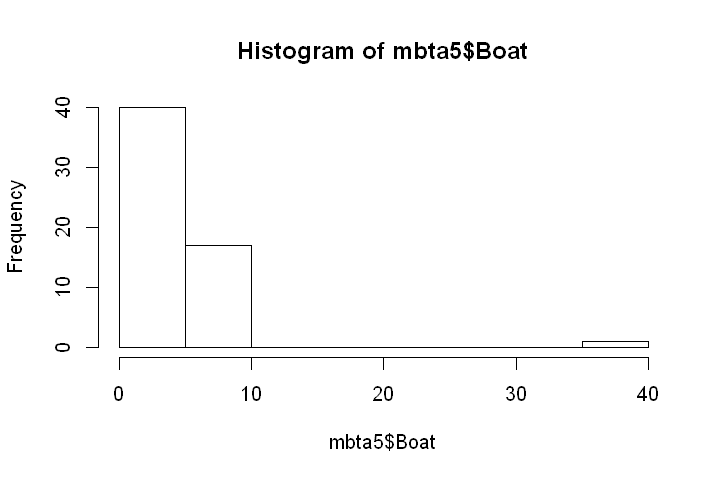

In [57]:
# View a summary of mbta6
summary(mbta5)

# Generate a histogram of Boat column
hist(mbta5$Boat)

we assume that it is an entry error and that it meant to ne 4 instead of 40.

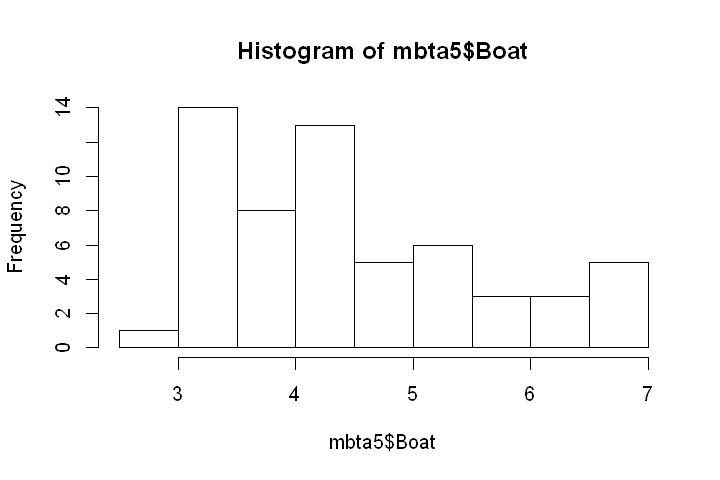

In [58]:
# Find the row number of the incorrect value: i
i <- which(mbta5$Boat >= 40)

# Replace the incorrect value with 4
mbta5$Boat[i] <- 4

# Generate a histogram of Boat column
hist(mbta5$Boat)

In [59]:
names(mbta5)
mbta_long <- gather(mbta5, key = "mode", value = "thou_riders", -year, -month)
names(mbta_long)

[1] "year"              "month"             "Boat"             
 [4] "Bus"               "Commuter Rail"     "Heavy Rail"       
 [7] "Light Rail"        "Private Bus"       "RIDE"             
[10] "Trackless Trolley"

[1] "year"        "month"       "mode"        "thou_riders"

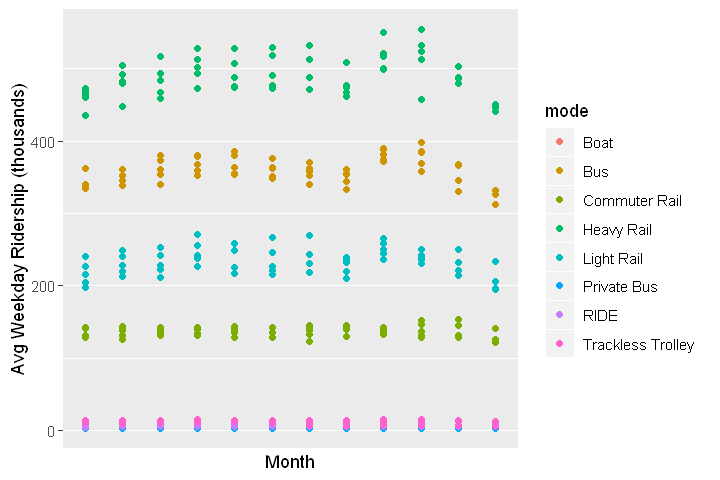

In [60]:
# Look at all T ridership over time (don't change)
ggplot(mbta_long, aes(x = month, y = thou_riders, col = mode)) + 
    geom_point() + 
    scale_x_discrete(name = "Month", breaks = c(200701, 200801, 200901, 201001, 201101)) +  
    scale_y_continuous(name = "Avg Weekday Ridership (thousands)")

In [61]:
mbta_boat <- mbta_long %>%
                filter(mode == "Boat" | mode == "Trackless Trolley")

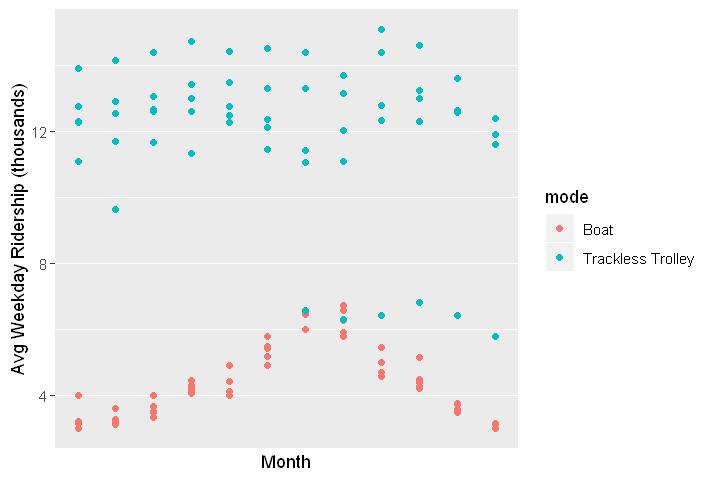

In [62]:
# Look at Boat and Trackless Trolley ridership over time (don't change)
ggplot(mbta_boat, aes(x = month, y = thou_riders, col = mode)) +  
    geom_point() + 
    scale_x_discrete(name = "Month", breaks = c(200701, 200801, 200901, 201001, 201101)) + 
    scale_y_continuous(name = "Avg Weekday Ridership (thousands)")